# INTRODUCTION

In [91]:
#library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [92]:
-- Explore the data in the table
SELECT *
FROM 'product_sales.csv'

week  sales_method  ... nb_site_visits          state
0         2         Email  ...             24        Arizona
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
3         4         Email  ...             25        Indiana
4         3         Email  ...             28       Illinois
...     ...           ...  ...            ...            ...
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[15000 rows x 8 columns]

In [93]:
df.head()

week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]

In [94]:
select * from 'product_sales.csv' limit 100;

week  sales_method  ... nb_site_visits      state
0      2         Email  ...             24    Arizona
1      6  Email + Call  ...             28     Kansas
2      5          Call  ...             26  Wisconsin
3      4         Email  ...             25    Indiana
4      3         Email  ...             28   Illinois
..   ...           ...  ...            ...        ...
95     1         Email  ...             23    Arizona
96     4          Call  ...             27   Kentucky
97     4          Call  ...             27       Ohio
98     5  Email + Call  ...             27   Michigan
99     6  Email + Call  ...             30   New York

[100 rows x 8 columns]

In this report, I will outline the process and findings from my analysis of the sales data provided. The report will cover several key areas to address the questions posed by the sales team and provide actionable insights. 

First, I will perform **data validation** by detailing the steps I took to clean and validate each column in the dataset, ensuring its accuracy and reliability for analysis. 

Next, I will conduct an **exploratory analysis** to answer the key questions raised by the sales team. This will include visualizing the data in two different types of graphs that focus on individual variables and at least one graph that examines the relationship between multiple variables. I will describe my findings from this analysis, offering insights into patterns and trends that emerge.

I will also define a **metric for the business to monitor**, suggesting how this metric should be tracked moving forward to align with business goals. I will estimate the initial value(s) of this metric based on the current data to provide a benchmark for future monitoring.

Finally, I will conclude with a **summary of my findings** and **recommendations** for the business to consider in order to optimize their strategies based on the data analysis. These recommendations will be grounded in the insights gained throughout the process, with the goal of helping the sales team make data-driven decisions moving forward.

# Data Validation

In [95]:
#counting rows and columns from our data frame
df.shape

(15000, 8)

In [96]:
#basic info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   week               15000 non-null  int64 
 1   sales_method       15000 non-null  object
 2   customer_id        15000 non-null  object
 3   nb_sold            15000 non-null  int64 
 4   revenue            15000 non-null  object
 5   years_as_customer  15000 non-null  int64 
 6   nb_site_visits     15000 non-null  int64 
 7   state              15000 non-null  object
dtypes: int64(4), object(4)
memory usage: 937.6+ KB


In [97]:
#counting nulls
null_counts = df.isna().sum()
print(null_counts)

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


We need to convert the data type of the 'revenue' column to numeric in order to accurately count the number of 'null' values.

In [98]:
#to convert type first we need to replace 'NA' with NaN
df['revenue'] = df['revenue'].replace('NA', np.nan)
#now we can convert column to 'float64' type
df['revenue'] = df['revenue'].astype('float64')

Now, after these operations, we can count null values from 'revenue' column.

In [99]:
null_counts = df.isna().sum()
print(null_counts)

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


As you can see there are 1074 null values in 'revenue' column.

In [100]:
#describing 
df.describe()

week       nb_sold  ...  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  ...       15000.000000    15000.000000
mean       3.098267     10.084667  ...           4.965933       24.990867
std        1.656420      1.812213  ...           5.044952        3.500914
min        1.000000      7.000000  ...           0.000000       12.000000
25%        2.000000      9.000000  ...           1.000000       23.000000
50%        3.000000     10.000000  ...           3.000000       25.000000
75%        5.000000     11.000000  ...           7.000000       27.000000
max        6.000000     16.000000  ...          63.000000       41.000000

[8 rows x 5 columns]

In [101]:
#checking the value counts to ensure there are only 3 unique values
print(df['sales_method'].value_counts())

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


Unfortunately, there are some unwanted values such as 'em + call' and 'email'. We need to clean these up.

In [102]:
df['sales_method'] = df['sales_method'].replace({'email': 'Email', 'em + call': 'Email + Call'})

In [103]:
print(df['sales_method'].value_counts())
#now it's as should be

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


We will analyze whether the presence of NaN values in the revenue column impacts the mean revenue for each sales method type.

In [104]:
# find avg revenue for each sales method
mean_rev_by_sales_method = df.groupby('sales_method')['revenue'].mean()
print(mean_rev_by_sales_method)

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64


I would like to replace NaN's with the overall mean of the 'revenue' column. This operation could help maintain consistency across the data.

In [105]:
# Replace NaN values with the overall mean revenue
mean_revenue = df['revenue'].mean()  # Calculate overall mean of the revenue column
df['revenue'] = df['revenue'].fillna(mean_revenue)

# Now, calculate the mean revenue grouped by sales_method
mean_rev_by_sales_method_filled = df.groupby('sales_method')['revenue'].mean()
print(mean_rev_by_sales_method, mean_rev_by_sales_method_filled)

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64 sales_method
Call             49.287730
Email            96.895049
Email + Call    171.477444
Name: revenue, dtype: float64


As you can see, there is a significant difference in mean for 'Email + Call' type.

In [106]:
null_counts = df.isna().sum()
print(null_counts)

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


In [107]:
print(max(df['years_as_customer']))

63


Company was founded in 1984 so there is no chance that some customer has been buying from as for 63 years now.

In [108]:
# Step 1: Calculate the highest possible value (current year - 1984)
from datetime import datetime
current_year = datetime.now().year
max_possible_years = current_year - 1984

# Step 2: Find values in 'years_as_customer' greater than the maximum possible value
invalid_values = df[df['years_as_customer'] > max_possible_years]

# Step 3: Print the invalid values
print(f"Maximum possible years as a customer: {max_possible_years}")
print("Values in 'years_as_customer' greater than the highest possible:")
print(invalid_values[['years_as_customer']])


Maximum possible years as a customer: 40
Values in 'years_as_customer' greater than the highest possible:
       years_as_customer
13741                 63
13800                 47


In [109]:
#replacing invalid values with highest possible value (40)
df.loc[df['years_as_customer'] > max_possible_years, 'years_as_customer'] = max_possible_years

In [110]:
print(max(df['years_as_customer']))

40


In [111]:
# check number of unique values for state
df['state'].nunique()

50

In [112]:
# check if any duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []

In [113]:
#final look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


# Exploratory Analysis

## Number of customers for each sales method

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


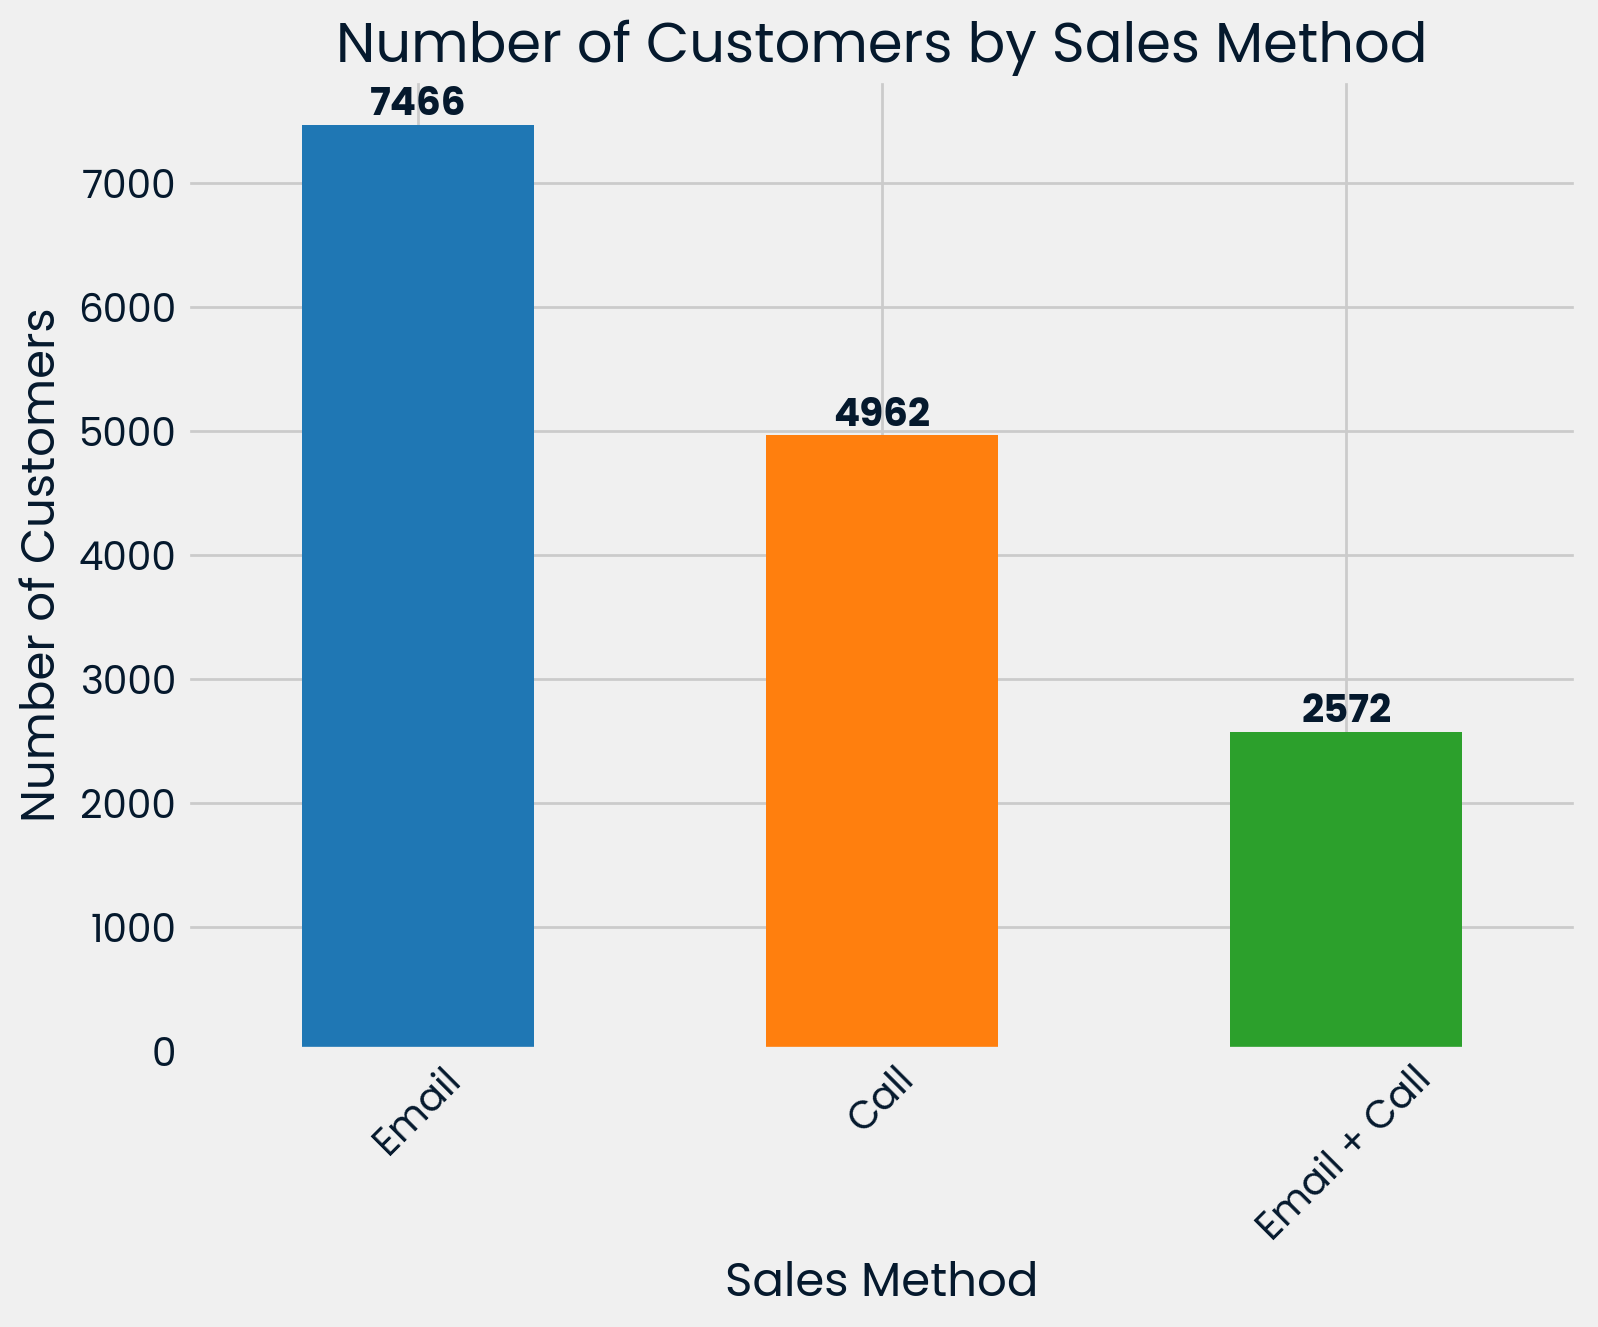

In [114]:
#recall number of customers for each sales method
customers_by_sales_method = df['sales_method'].value_counts()
print(customers_by_sales_method)

#ploting
#Define custom colors for each sales method type
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # For example, you can define your own color palette

#Plotting the data with custom colors
plt.figure(figsize=(8, 6))
bars = customers_by_sales_method.plot(kind='bar', color=colors)

#Adding title and labels
plt.title('Number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate labels for better readability

#Annotating each bar with the respective value
for bar in bars.patches:
    yval = bar.get_height()  # Get the height of each bar (value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Position the label
             round(yval, 2), ha='center', va='bottom', fontweight='bold')  # Display the value

#Display the plot
plt.show()

During the 6-week period, the most popular sales method was Email, with a total of 7,466 customers. This was followed by the Call method, which engaged 4,962 customers, and the Email + Call method, which had 2,572 customers.

## What is the spread of revenue overall and for each sales method?


### _Calculating the Spread of Revenue Overall and by Sales Method_

In [115]:
#Overall revenue spread
overall_revenue_description = df['revenue'].describe()

#Revenue spread for each sales method
revenue_by_sales_method = df.groupby('sales_method')['revenue'].describe()

#Print the overall revenue spread and spread by sales method
print("Overall Revenue Spread:")
print(overall_revenue_description)

print("\nRevenue Spread by Sales Method:")
print(revenue_by_sales_method)

Overall Revenue Spread:
count    15000.000000
mean        93.934943
std         45.705474
min         32.540000
25%         53.040000
50%         91.865000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64

Revenue Spread by Sales Method:
               count        mean        std  ...      50%       75%         max
sales_method                                 ...                               
Call          4962.0   49.287730  12.120498  ...   49.935   52.9775   93.934943
Email         7466.0   96.895049  10.826126  ...   94.275  104.4600  148.970000
Email + Call  2572.0  171.477444  40.931708  ...  182.135  189.5350  238.320000

[3 rows x 8 columns]


### _Visualizing the Spread using Box Plot_

In [116]:
#Plotting revenue spread overall
plt.figure(figsize=(10, 6))

#Create boxplot for overall revenue 
sns.boxplot(y='revenue', data=df, palette='Set2')

#Adding title and labels
plt.title('Spread of Revenue overall')
plt.ylabel('Revenue')

#Display the plot
plt.show()

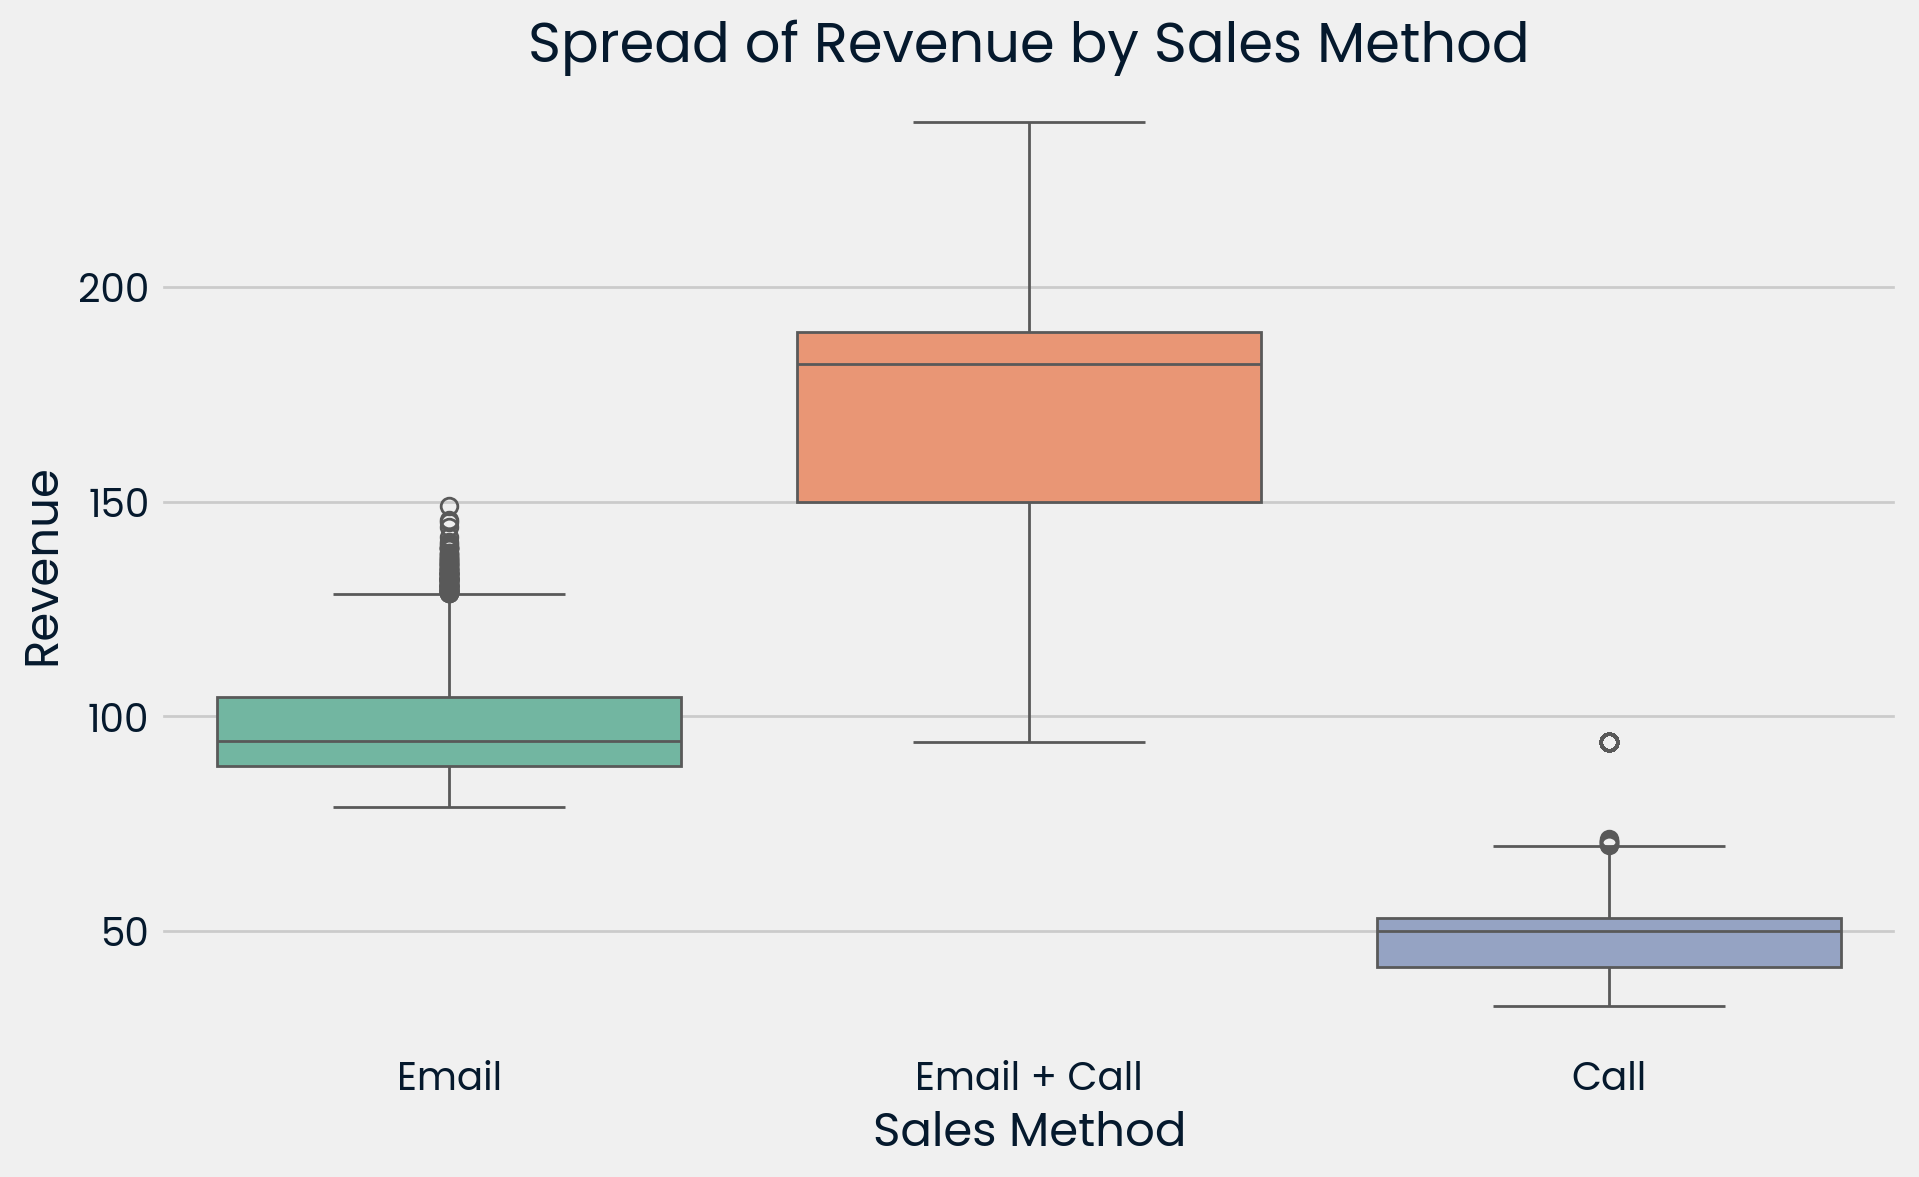

In [117]:
#Plotting revenue spread by sales method
plt.figure(figsize=(10, 6))

#Create boxplot for revenue by sales method
sns.boxplot(x='sales_method', y='revenue', data=df, palette='Set2')

#Adding title and labels
plt.title('Spread of Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')

#Display the plot
plt.show()

### _Visualizing the Spread using Histogram_

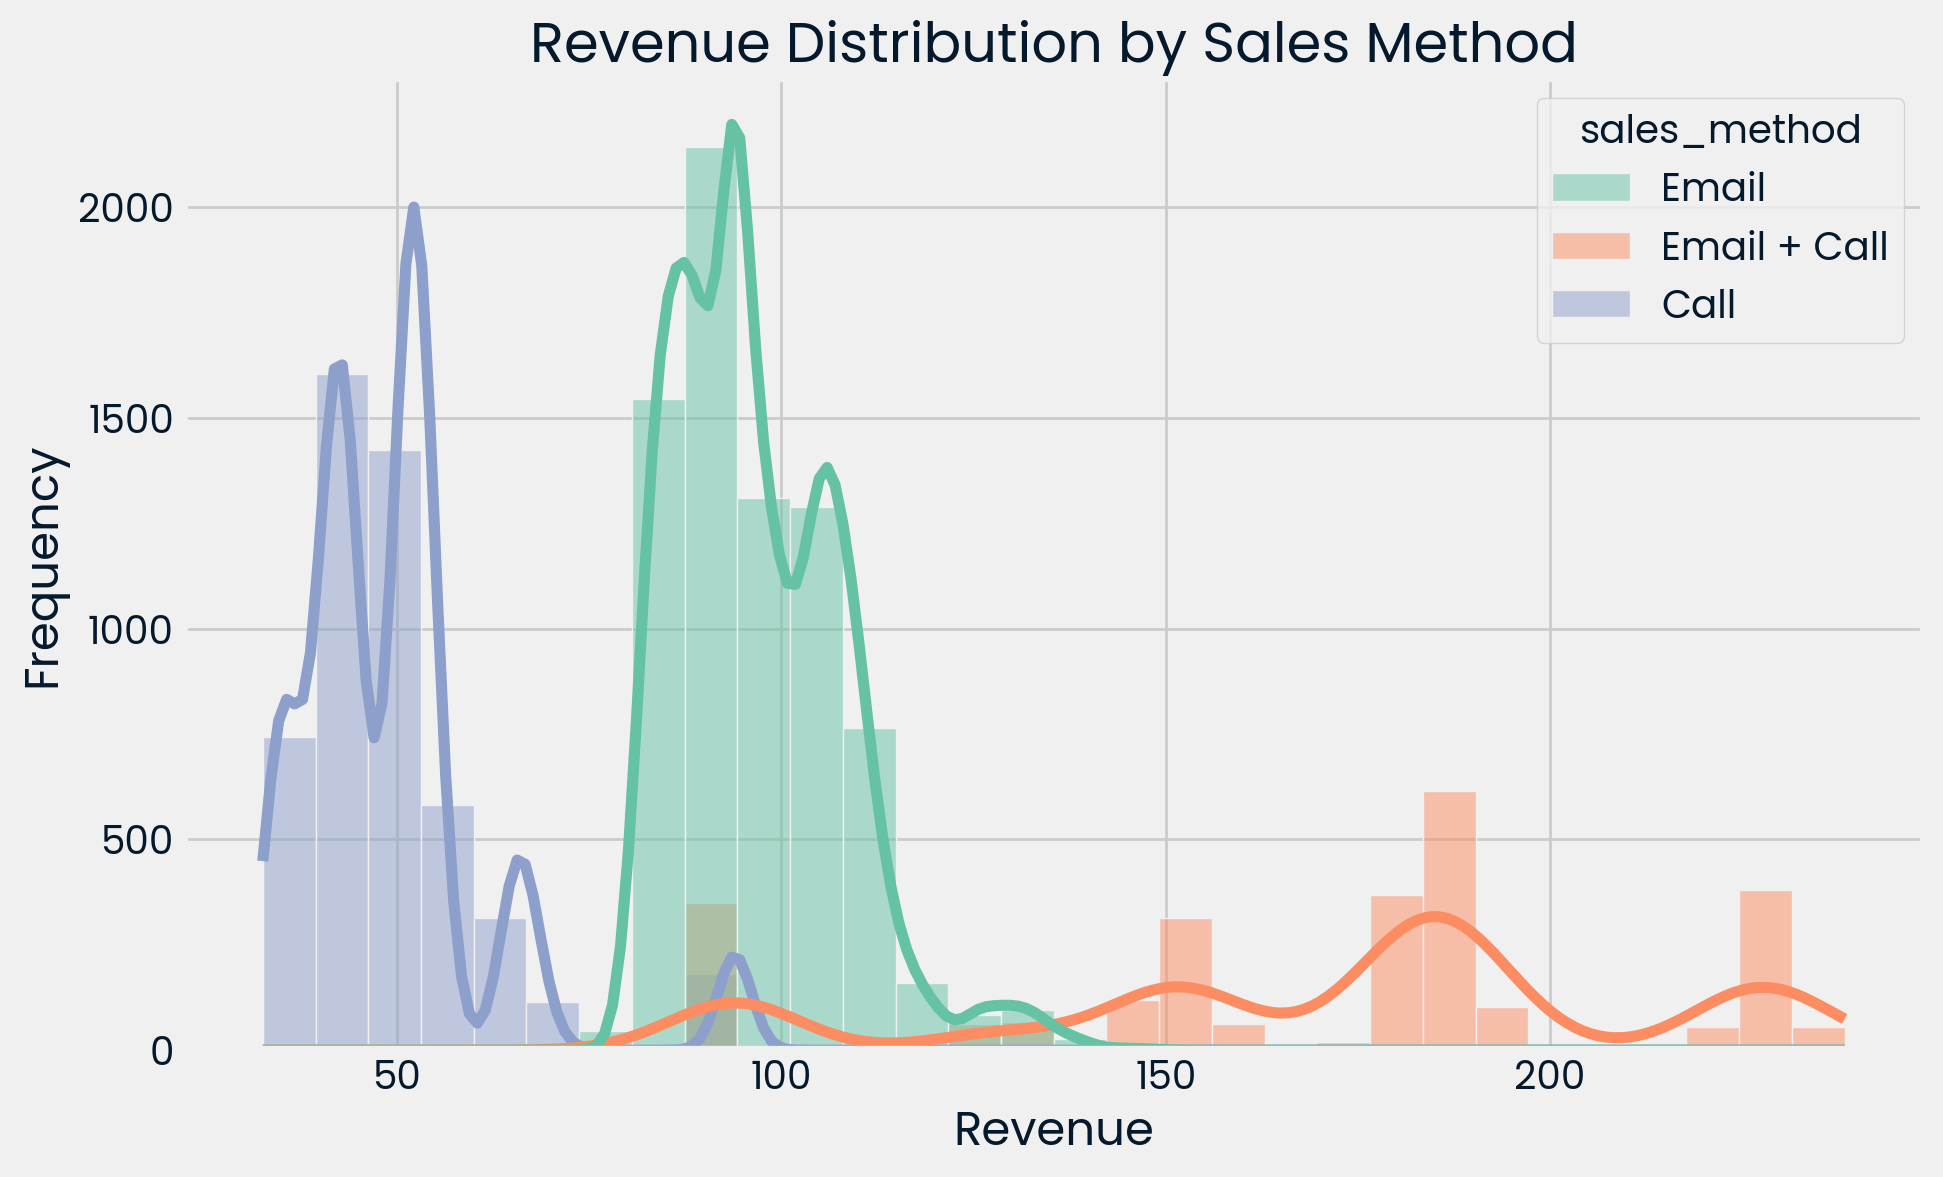

In [118]:
#Plotting histograms for overall revenue and by sales method
plt.figure(figsize=(10, 6))

#Plotting revenue for each sales method
sns.histplot(data=df, x='revenue', hue='sales_method', kde=True, bins=30, palette='Set2')

#Adding title and labels
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

#Display the plot
plt.show()


## Revenue over time for each sales method

In [119]:
#Grouping by week and sales_method and calculating the sum of revenue for each group
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

print(revenue_over_time)

    week  sales_method        revenue
0      1          Call   27850.008966
1      1         Email  247519.254143
2      1  Email + Call   18482.224023
3      2          Call   36610.068277
4      2         Email  148130.478738
5      2  Email + Call   29100.343334
6      3          Call   39441.058047
7      3         Email  106776.610117
8      3  Email + Call   52024.862989
9      4          Call   53445.322645
10     4         Email  115772.840117
11     4  Email + Call   84120.166438
12     5          Call   56993.702874
13     5         Email   80009.546553
14     5  Email + Call  137236.498623
15     6          Call   30225.553794
16     6         Email   25209.709081
17     6  Email + Call  120075.889543


In [120]:
#Plotting revenue over time for each sales method
plt.figure(figsize=(10, 6))

#Create a line plot for revenue over time
sns.lineplot(x='week', y='revenue', hue='sales_method', data=revenue_over_time, marker='o', palette='Set2')

#Adding title and labels
plt.title('Revenue Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6])  # Ensure weeks 1-6 are displayed on x-axis

#Display the plot
plt.show()

In [121]:
#unstacking 
revenue_over_time_us = df.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
revenue_over_time_us

sales_method          Call          Email   Email + Call
week                                                    
1             27850.008966  247519.254143   18482.224023
2             36610.068277  148130.478738   29100.343334
3             39441.058047  106776.610117   52024.862989
4             53445.322645  115772.840117   84120.166438
5             56993.702874   80009.546553  137236.498623
6             30225.553794   25209.709081  120075.889543

_**Interpretation**_

The following observations can be made from the table:

In the first week, the 'Email' sales method generated the highest revenue (247519.25), followed by 'Call' (27850.01) and 'Email + Call' (18482.22). It is noteworthy that the 'Email' method required the least effort from the sales team, making it the most efficient choice during week one.

Over the course of the 6-week period, revenue from the 'Email' method steadily declined, suggesting that the effectiveness of this approach may have diminished over time.

In contrast, the 'Call' method exhibited a general upward trend in revenue, with some fluctuations. However, as the 6 weeks progressed, revenue from 'Call' began to decline toward the end of the period.

The 'Email + Call' method demonstrated a consistent and healthy increase in revenue throughout the entire 6-week period, indicating its potential for long-term revenue growth compared to the other methods.

In conclusion, the 'Email + Call' method appears to offer the most promise for long-term revenue generation, although it requires more effort from the sales team. While the 'Email' method performs well initially, it shows a steady decline over time, and the 'Call' method, despite an overall upward trend, fluctuates more. When deciding which method to continue using, it is important to weigh the effort required against the potential for sustained revenue growth.

If it were up to me, based on the above observations, I would recommend using the 'Email + Call' method, which appears to strike the optimal balance between the team's effort and the results achieved.

## Investigating other differences between customers in each group

In [122]:
unique_values_count = df['customer_id'].nunique()
print(unique_values_count)

15000


Let's see if any columns are correlated to each other.

In [123]:
#Calculating the correlation matrix for certain numeric columns
correlation_matrix = df[['years_as_customer', 'nb_site_visits', 'revenue', 'nb_sold']].corr()

#Print the correlation matrix
print(correlation_matrix)

                   years_as_customer  nb_site_visits   revenue   nb_sold
years_as_customer           1.000000       -0.049000 -0.062526 -0.099448
nb_site_visits             -0.049000        1.000000  0.310469  0.490718
revenue                    -0.062526        0.310469  1.000000  0.662441
nb_sold                    -0.099448        0.490718  0.662441  1.000000


In [124]:
#let's plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

As expected, there is a strong correlation between the number of items sold (nb_sold) and revenue, which is natural since an increase in the number of products sold leads to higher revenue. Interestingly, and less obvious, there is also a moderate yet noticeable correlation between the number of items sold (nb_sold) and the number of site visits (nb_site_visits), suggesting that as website traffic increases, there is also a tendency for purchases to rise.

In [125]:
#Calculating average revenue per customer by sales method and week
avg_revenue_per_customer = (
    df.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()
)

#Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=avg_revenue_per_customer,
    x='week',
    y='revenue',
    hue='sales_method',
    marker='o'
)

#Adding labels and title
plt.title('Average Revenue per Customer by Sales Method Over Time', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Revenue per Customer', fontsize=12)
plt.xticks(range(1, 7))  # Assuming weeks range from 1 to 6
plt.legend(title='Sales Method', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Interestingly, regardless of the sales method chosen, the average revenue per customer within each method shows a similar trend, which is upward.

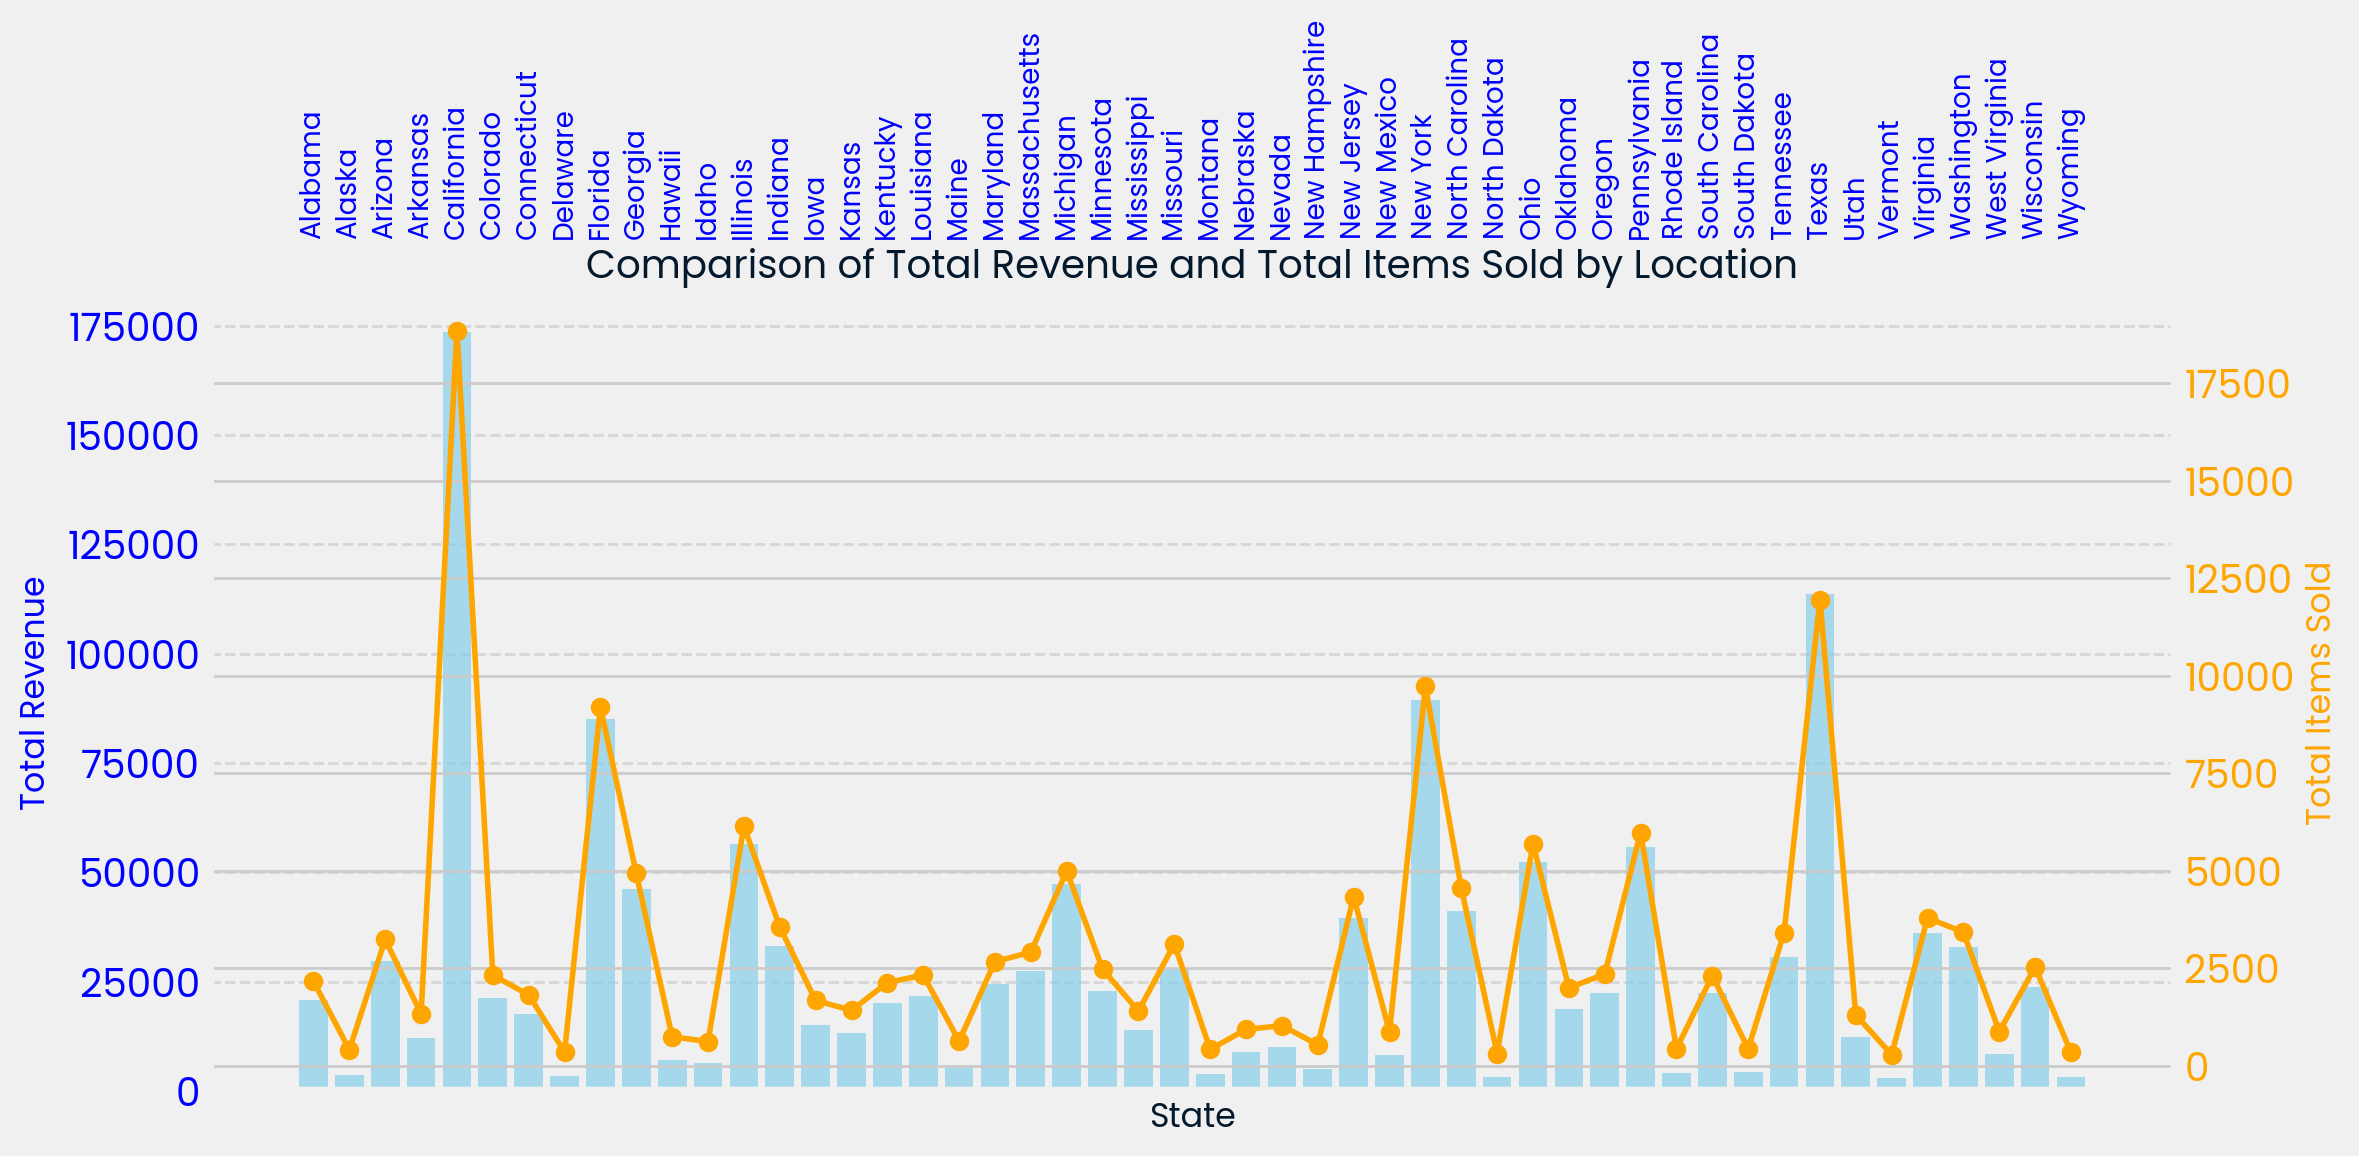

In [126]:
total_revenue_sold = df.groupby('state').agg(
    total_revenue=('revenue', 'sum'),
    total_nb_sold=('nb_sold', 'sum')
).reset_index()

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total revenue
bars = ax1.bar(
    total_revenue_sold['state'],
    total_revenue_sold['total_revenue'],
    color='skyblue',
    label='Total Revenue',
    alpha=0.7
)

ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Total Revenue', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Comparison of Total Revenue and Total Items Sold by Location', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks([])

# Line plot for total items sold
ax2 = ax1.twinx()
ax2.plot(
    total_revenue_sold['state'],
    total_revenue_sold['total_nb_sold'],
    color='orange',
    marker='o',
    label='Total Items Sold',
    linewidth=2
)
ax2.set_ylabel('Total Items Sold', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Annotate state names above bars
for bar, state in zip(bars, total_revenue_sold['state']):
    height = bar.get_height()
    ax1.annotate(
        state,
        xy=(bar.get_x() + bar.get_width() / 2, max(total_revenue_sold['total_revenue']) * 1.05), #fixing position
        xytext=(0, 20),  # Offset text slightly above the bar
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10,
        color='blue',
        rotation=90
    )

# Show the plot
plt.tight_layout()
plt.show()

In [127]:
total_revenue_sold

state  total_revenue  total_nb_sold
0          Alabama   20711.079311           2161
1           Alaska    3669.664713            412
2          Arizona   29643.488506           3238
3         Arkansas   12110.469196           1327
4       California  173534.237360          18859
5         Colorado   21236.308966           2322
6      Connecticut   17479.869311           1816
7         Delaware    3438.364598            350
8          Florida   84978.675519           9201
9          Georgia   46150.523334           4930
10          Hawaii    6995.324713            740
11           Idaho    6306.194828            620
12        Illinois   56500.682645           6143
13         Indiana   33160.513449           3558
14            Iowa   15011.414368           1672
15          Kansas   13163.104253           1420
16        Kentucky   19994.414368           2131
17       Louisiana   21811.064023           2325
18           Maine    5600.994828            634
19        Maryland   24480.148966           2669
20   Massachusetts   27480.028621           2913
21        Michigan   47430.728162           4998
22       Minnesota   22949.534023           2475
23     Mississippi   13913.099655           1399
24        Missouri   28207.793564           3122
25         Montana    3773.199885            420
26        Nebraska    8910.694713            931
27          Nevada   10057.224713           1027
28   New Hampshire    4907.324713            536
29      New Jersey   39532.948162           4338
30      New Mexico    8206.744713            865
31        New York   89442.446209           9734
32  North Carolina   41142.263334           4559
33    North Dakota    3071.604713            312
34            Ohio   52331.947357           5699
35        Oklahoma   18828.869311           1998
36          Oregon   22481.354138           2347
37    Pennsylvania   55822.422415           5979
38    Rhode Island    4135.969885            434
39  South Carolina   22377.454368           2313
40    South Dakota    4262.494828            432
41       Tennessee   30700.888162           3414
42           Texas  113621.375519          11957
43            Utah   12285.914483           1300
44         Vermont    2841.364943            282
45        Virginia   36191.678506           3790
46      Washington   32840.698506           3424
47   West Virginia    8453.469540            876
48       Wisconsin   23680.318966           2528
49         Wyoming    3165.744943            340

In [128]:
average_revenue_per_customer = df.groupby('state')['revenue'].mean()

# Display the result
print(average_revenue_per_customer)

state
Alabama            96.780744
Alaska             91.741618
Arizona            92.347316
Arkansas           91.745979
California         92.699913
Colorado           92.331778
Connecticut        97.652901
Delaware          101.128371
Florida            94.002960
Georgia            94.377348
Hawaii             97.157288
Idaho             101.712820
Illinois           91.573230
Indiana            93.673767
Iowa               90.978269
Kansas             92.697917
Kentucky           93.870490
Louisiana          94.830713
Maine              88.904680
Maryland           93.080414
Massachusetts      93.469485
Michigan           95.242426
Minnesota          93.671567
Mississippi       100.094242
Missouri           90.700301
Montana            83.848886
Nebraska           97.919722
Nevada             98.600242
New Hampshire      92.591032
New Jersey         91.089742
New Mexico         97.699342
New York           92.686473
North Carolina     89.634561
North Dakota      102.386824
Ohio    

Average nb_sold and nb_site_visits by sales_method.

In [129]:
average_factors = df.groupby('sales_method')[['nb_sold', 'nb_site_visits']].mean()

#Displaying the result
print(average_factors)

                nb_sold  nb_site_visits
sales_method                           
Call           9.509674       24.423821
Email          9.729306       24.754353
Email + Call  12.225505       26.771384


# Metric for the Business to Monitor

Metric Name: **Revenue per Customer per Unit of Effort RCUE**

Formula: The metric will be Revenue per Customer per Unit of Effort, which incorporates both the revenue generated and the amount of time or effort the sales team spends on each customer.

Effort Factor for each method:

1. **Email**: Very little effort. We can assign an effort factor of 0.5.
2. **Call**: On average, 30 minutes per customer. We can assign an effort factor of 3 (since calls are more effort-intensive).
3. **Email + Call**: Email is quick, but calls take 10 minutes on average. Assign an effort factor of 1, considering that the call still requires time but less than the full call method.

**Formula for the Metric:**
![Zrzut ekranu 2024-11-24 214058](Zrzut%20ekranu%202024-11-24%20214058.png)

Where:

1. Total Revenue is the sum of revenue for each sales method.
2. Number of Customers is the count of unique customers for each sales method.
3. Effort Factor is assigned based on the method:

Email = 0.5

Call = 3

Email + Call = 1.

**How Should the Business Monitor the Metric?**

The business should monitor this metric to evaluate both the revenue generation and the effort required for each sales method. By doing so, they can assess the efficiency of each sales method and allocate resources accordingly.

To calculate the metric, you can use the following steps in Python.

In [130]:
#Calculating the average revenue per customer without considering the effort factor
df['avg_revenue'] = df['revenue'] / df['customer_id'].nunique()

#Defining the effort factor for each sales method
effort_factors = {
    'Email': 0.5,
    'Call': 3,
    'Email + Call': 1
}

#Adding a new column 'effort_factor' based on the 'sales_method'
df['effort_factor'] = df['sales_method'].map(effort_factors)

#Calculating the revenue per customer per unit of effort for each sales method and week
avg_revenue_per_effort = df.groupby(['sales_method', 'week']).apply(
    lambda x: x['revenue'].sum() / (x['customer_id'].nunique() * x['effort_factor'].mean())
).reset_index(name='avg_revenue_per_effort RCUE')

#Calculating avg_revenue without considering effort factor
avg_revenue = df.groupby(['sales_method', 'week']).apply(
    lambda x: x['revenue'].sum() / x['customer_id'].nunique()
).reset_index(name='avg_revenue')

#Merging both dataframes (avg_revenue and avg_revenue_per_effort) on sales_method and week
final_df = pd.merge(avg_revenue_per_effort, avg_revenue, on=['sales_method', 'week'])

#Displaying the result
print(final_df)


    sales_method  week  avg_revenue_per_effort RCUE  avg_revenue
0           Call     1                    12.247146    36.741437
1           Call     2                    15.159449    45.478346
2           Call     3                    14.575409    43.726228
3           Call     4                    17.726475    53.179426
4           Call     5                    18.197223    54.591669
5           Call     6                    22.489251    67.467754
6          Email     1                   175.857374    87.928687
7          Email     2                   199.368074    99.684037
8          Email     3                   185.698452    92.849226
9          Email     4                   215.391330   107.695665
10         Email     5                   215.368901   107.684450
11         Email     6                   255.936133   127.968066
12  Email + Call     1                   124.879892   124.879892
13  Email + Call     2                   145.501717   145.501717
14  Email + Call     3   

**Key Takeaways for the Business:**

1. Revenue per Customer per Unit of Effort will help the business identify which sales methods are delivering the most value relative to the effort put in.
2. Methods that provide a high return on effort are more efficient, and the business may want to focus more resources on these methods.
3. The business should track this metric weekly to assess trends and adjust strategies to optimize sales efforts.

In [131]:
print(final_df.iloc[[5,11,17]][['sales_method', 'avg_revenue_per_effort RCUE']].reset_index())

   index  sales_method  avg_revenue_per_effort RCUE
0      5          Call                    22.489251
1     11         Email                   255.936133
2     17  Email + Call                   205.962075


As we can see, in the sixth week, there is a significant difference in the RCUE (Revenue per Customer per Unit of Effort) indicator between the Email and Call sales methods, suggesting that the Email method was considerably much more profitable during this time period, however, it is important to note that the Email + Call method recorded a higher average revenue per customer over the 6-week period. 

# Conclusion and Recommendations

Considering all factors from the analysis, it is recommended to prioritize the **Email + Call** method for the following reasons:

Although the 'Email' method has the highest RCUE, the 'Email + Call' approach generates greater customer engagement, as reflected by higher website visits and an increased average number of items purchased. This engagement could foster stronger customer relationships and support long-term growth.

The 'Email + Call' method has also demonstrated a steady upward trend in revenue generation over the past six weeks, highlighting its potential for sustained success.

In contrast, the 'Call' method is the least efficient in terms of effort and revenue generation, with a declining revenue trend over time.

Additionally, 'Email + Call' has the highest average revenue per customer. 

In final conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it offers better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return. Continuous monitoring of key metrics such as customer engagement, website visits, and revenue per customer will be essential to ensure that the chosen sales strategy continues to deliver strong results. By regularly evaluating and refining our approach, we can maintain a competitive edge and drive long-term success.